## Importing Necessary Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data into dataframe

In [106]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing Data

<Axes: >

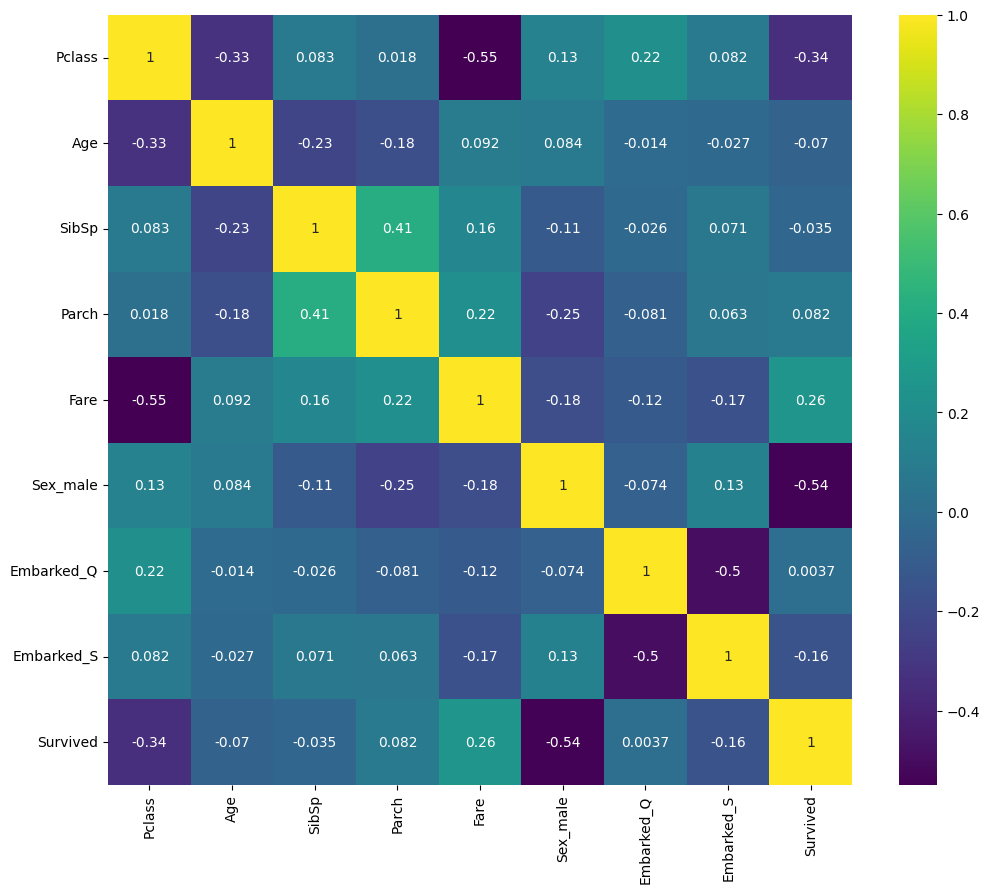

In [107]:
data1 = data.drop(['Name','PassengerId', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = data['Survived']
data_cat =data1.select_dtypes(include=['object'])  
data_num1 =data1.select_dtypes(include=['number'])
data_num = data_num1.fillna(data_num1.mean())
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_num_norm = (data_num - mean) / std

data_cat_proc = pd.get_dummies(data_cat, drop_first=True) 
boolean_cols = data_cat_proc.columns[data_cat_proc.dtypes == 'bool']
data_cat_proc[boolean_cols] = data_cat_proc[boolean_cols].astype(int)
data_proc = pd.concat([data_num_norm, data_cat_proc], axis=1) 
plt.figure(figsize=(12,10))
data_for = pd.concat([data_proc, y], axis=1) 
cor = data_for.corr()
sns.heatmap(cor, annot=True, cmap = 'viridis')

## Performing PCA
### Forming covariance matrix, sorting them in order

In [108]:
cov_matrix = data_proc.cov()
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print(f'Eigenvalues of P:\n{sorted_eigenvalues}\n\nEigenvectors of P\n{sorted_eigenvectors}')

Eigenvalues of P:
[1.70004356 1.64644216 0.72839175 0.5844316  0.38551247 0.23957956
 0.17755232 0.04615388]

Eigenvectors of P
[[ 0.67961463 -0.04049813 -0.1754576  -0.04084729  0.69200323  0.05592678
   0.13274117  0.06643408]
 [-0.4007903   0.38045236 -0.80258914  0.06214458  0.20658965 -0.02930057
   0.05186434  0.01959965]
 [ 0.04426261 -0.61769321 -0.28411588  0.72221947 -0.10152702 -0.05698523
  -0.02141009  0.01263674]
 [-0.04891901 -0.61731112 -0.35555182 -0.67882822 -0.0941152   0.03937675
  -0.13701167 -0.01134266]
 [-0.60502081 -0.28349504  0.33263943  0.03143302  0.63570548  0.17045517
   0.0890685  -0.02887468]
 [ 0.05689624  0.10099679 -0.03419893  0.10468696  0.04215001  0.64385793
  -0.74616644 -0.03659956]
 [ 0.03754412  0.01524003 -0.0050751   0.01002813  0.11795355 -0.31616189
  -0.21467505 -0.91557365]
 [ 0.04941573 -0.01399766 -0.07798764  0.00358751 -0.19868498  0.66906613
   0.59133438 -0.39302118]]


### Creating Scree Plot to see importance of eigenvectors

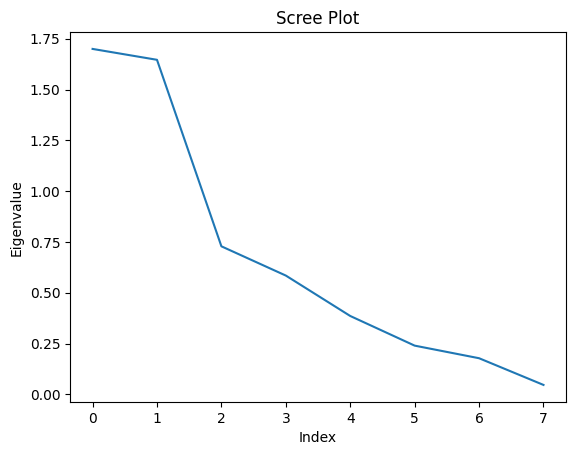

In [109]:
plt.plot(sorted_eigenvalues)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

### Selecting Principle components

In [110]:
k = 7
principal_components = eigenvectors[:, :k]
pca_features = pd.DataFrame(np.dot(data_proc, principal_components))
print(pca_features)


            0         1         2         3         4         5         6
0    1.251745 -0.004356  0.096364  0.655673 -0.360956 -0.025229 -0.064904
1   -1.753115  0.108396  0.069249  0.762088 -0.103343 -0.450689 -0.049013
2    1.023191  0.567983  0.145814 -0.084398 -0.330178  0.096880  0.717844
3   -1.389840  0.110349  0.054730  0.739835 -0.490321 -0.929652  0.497763
4    0.801138  0.931616 -0.443101  0.063384 -0.353284  0.283630  0.007802
..        ...       ...       ...       ...       ...       ...       ...
886  0.174606  0.717727  0.293718  0.077135 -0.447679 -0.607843 -0.174005
887 -0.655531  0.334097  1.145396 -0.006180 -0.512477 -1.387317  0.411952
888  0.638907 -1.504169 -1.118448 -1.086286 -0.350307  0.028672  0.401055
889 -0.863827  0.653919  0.757088  0.128377 -0.145503 -1.035259 -0.897626
890  0.885395  0.874782 -0.187012  0.055296 -0.880184  0.548764 -0.810712

[891 rows x 7 columns]


## Splitting Train and Test data for both normal and PCA features

In [111]:
test_size = 0.3

n_samples = data_proc.shape[0]
n_samplespca = pca_features.shape[0]

n_test_samples = int(n_samples * test_size)
n_test_samplespca = int(n_samplespca * test_size)

indices = np.arange(n_samples)
indicespca = np.arange(n_samplespca)
np.random.shuffle(indices)
np.random.shuffle(indicespca)

# Split the data into training and testing sets
train_indices = indices[n_test_samples:]
test_indices = indices[:n_test_samples]
train_indicespca = indicespca[n_test_samplespca:]
test_indicespca = indicespca[:n_test_samplespca]

X_train = data_proc.iloc[train_indices]
y_train = y.iloc[train_indices]
X_trainpca = pca_features.iloc[train_indicespca]
y_trainpca = y.iloc[train_indicespca]



X_test = data_proc.iloc[test_indices]
y_test = y.iloc[test_indices]
X_testpca = pca_features.iloc[test_indicespca]
y_testpca = y.iloc[test_indicespca]
ll_values = []

## Defining Functions for Logistic Regression

In [112]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def log_loss(y_true, y_pred):
    # Calculate the log loss
    epsilon = 1e-15
    loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
    return loss

## Creating Class for Logistic Regression

In [113]:
class LogisticRegression:
    def __init__(self, lr = 0.1, n_iters = 700):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        prev_mse = float('inf')
        for i in range(self.n_iters):
            linearpred = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linearpred)
            delw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            delb = (1/n_samples)*np.sum(y_predicted - y)
            self.weights = self.weights - self.lr*delw
            self.bias = self.bias - self.lr*delb
            loglossv = log_loss(y, y_predicted)
            ll_values.append(loglossv)
#            if i > 0:
#                if prev_mse - mse < 1e3:
#                    break
#            prev_mse = mse
    def predict(self, X):
        linearpred = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linearpred)
        predicted = [0 if y<=0.5 else 1 for y in y_predicted]
        return predicted

## Defining evaluation parameters

In [114]:
def f1_score(tp,fp,tn,fn):
    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    print("Precision:", precision)
    print("Recall:", recall)
    f1 = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    return f1
def confusion_matrix(tp, fp, tn, fn):
    data = [[tn, fp], [fn, tp]]
    plt.imshow(data, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])

    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                plt.text(j, i, f'TN: {tn}', ha='center', va='center', color='white')
            elif i == 0 and j == 1:
                plt.text(j, i, f'FP: {fp}', ha='center', va='center', color='black')
            elif i == 1 and j == 0:
                plt.text(j, i, f'FN: {fn}', ha='center', va='center', color='black')
            elif i == 1 and j == 1:
                plt.text(j, i, f'TP: {tp}', ha='center', va='center', color='black')


## Executing Logistic Regression on Normal Dataset

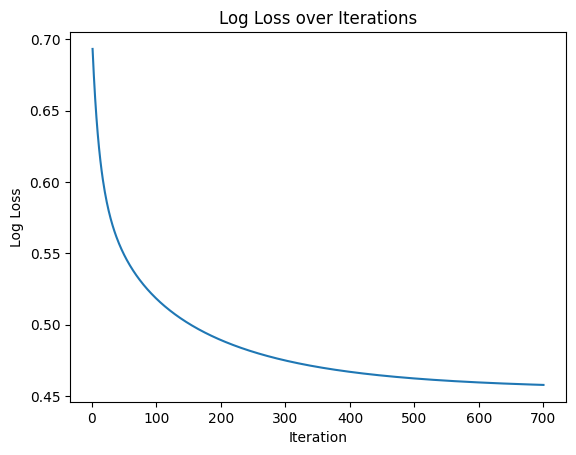

Precision: 0.71
Recall: 0.7553191489361702
F1 score: 0.731958762886598


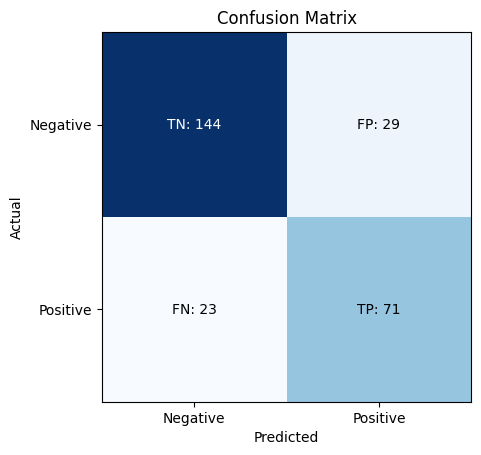

In [115]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
def accuracy(y_pred,y_test):
    return np.sum(y_pred==y_test)/len(y_test)
predictions_array = np.array(predictions)
y_test_array = np.array(y_test)
tp = np.sum((y_test_array == 1) & (predictions_array == 1))
fp = np.sum((y_test_array == 0) & (predictions_array == 1))
tn = np.sum((y_test_array == 0) & (predictions_array == 0))
fn = np.sum((y_test_array == 1) & (predictions_array == 0)) 
plt.show()
plt.plot(range(1, len(ll_values) + 1), ll_values)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Log Loss over Iterations")
plt.show()
f1 = f1_score(tp,fp,tn,fn)
print("F1 score:",f1)
confusion_matrix(tp,fp,tn,fn)
ll_values = []

## Executing Logistic Regression on Dataset with PCA

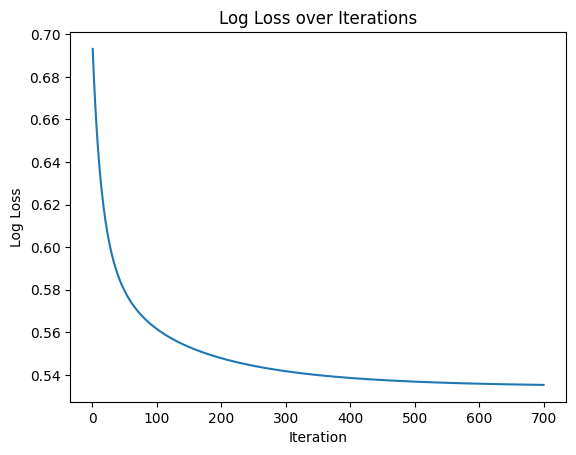

Precision: 0.7951807228915663
Recall: 0.6666666666666666
F1 score: 0.7252747252747251


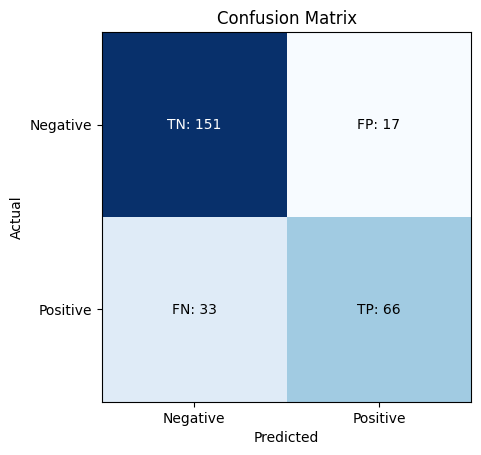

In [116]:
classifier2 = LogisticRegression(lr=0.1)
classifier2.fit(X_trainpca, y_trainpca)
predictionspca = classifier2.predict(X_testpca)
predictions_arraypca = np.array(predictionspca)
y_test_arraypca = np.array(y_testpca)
tp = np.sum((y_test_arraypca == 1) & (predictions_arraypca == 1))
fp = np.sum((y_test_arraypca == 0) & (predictions_arraypca == 1))
tn = np.sum((y_test_arraypca == 0) & (predictions_arraypca == 0))
fn = np.sum((y_test_arraypca == 1) & (predictions_arraypca == 0))
plt.show()
plt.plot(range(1, len(ll_values) + 1), ll_values)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Log Loss over Iterations")
plt.show()
f1 = f1_score(tp,fp,tn,fn)
print("F1 score:",f1)
confusion_matrix(tp,fp,tn,fn)
ll_values = []

## Creating Class for Support Vector Machines

In [117]:

class SupportVectorMachine:
    def __init__(self, reg_strength=0.1, n_iters=700, lr=0.1):
        self.reg_strength = reg_strength
        self.n_iters = n_iters
        self.lr = lr
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y = np.array(y)
        X = np.array(X)
        y = np.where(y == 0, -1, 1)

        for epoch in range(self.n_iters):
            linear_output = np.dot(X, self.weights) + self.bias
            distances = 1 - y * linear_output
            dw = np.zeros(n_features)
            db = 0

            for i in range(n_samples):
                if distances[i] > 0:
                    dw += -y[i] * X[i]
                    db += -y[i]
            dw = dw / n_samples + (self.reg_strength * self.weights / n_samples)
            db = db / n_samples
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            cost = (1 / n_samples) * np.sum(np.maximum(0, 1 - y * (np.dot(X, self.weights) + self.bias))) + (self.reg_strength / 2) * np.sum(self.weights ** 2)
            if epoch % 100 == 0 or epoch == self.n_iters - 1:
                print(f"Epoch {epoch}/{self.n_iters} | Cost1: {cost}")
            ll_values.append(cost)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


## Executing Support Vector Machine Classification on Normal Dataset

Epoch 0/700 | Cost1: 0.9931774478779817
Epoch 100/700 | Cost1: 0.6444668099080895
Epoch 200/700 | Cost1: 0.6231898757272114
Epoch 300/700 | Cost1: 0.6140851623388505
Epoch 400/700 | Cost1: 0.6104669263553423
Epoch 500/700 | Cost1: 0.6089484155999035
Epoch 600/700 | Cost1: 0.6091441440595518
Epoch 699/700 | Cost1: 0.6105810173428601


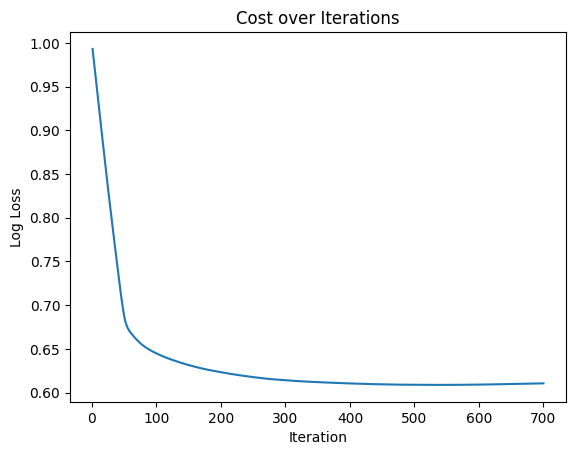

Precision: 0.8125
Recall: 0.6914893617021277
F1 score: 0.7471264367816093


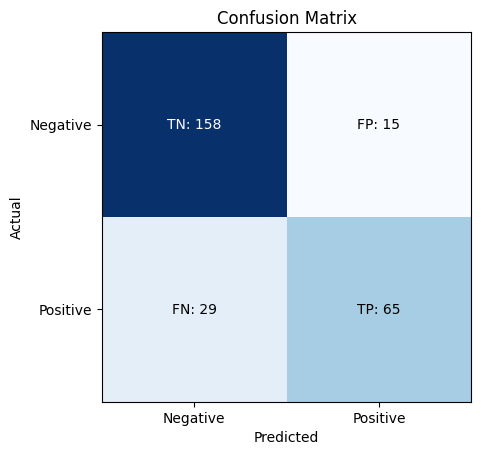

In [ ]:
svmobj = SupportVectorMachine(lr=0.017)
svmobj.fit(X_train, y_train)
predictions = svmobj.predict(X_test)
predictions_array = np.array(predictions)
y_test_array = np.array(y_test)
tp = np.sum((y_test_array == 1) & (predictions_array == 1))
fp = np.sum((y_test_array == 0) & (predictions_array == 1))
tn = np.sum((y_test_array == 0) & (predictions_array == 0))
fn = np.sum((y_test_array == 1) & (predictions_array == 0))
plt.show()
plt.plot(range(1, len(ll_values) + 1), ll_values)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over Iterations")
plt.show()
f1 = f1_score(tp,fp,tn,fn)
print("F1 score:",f1)
confusion_matrix(tp,fp,tn,fn)
ll_values = []

## Executing Support Vector Machine Classification on Dataset with PCA

Epoch 0/700 | Cost1: 0.9954900676215891
Epoch 100/700 | Cost1: 0.6699986999477794
Epoch 200/700 | Cost1: 0.654763044124767
Epoch 300/700 | Cost1: 0.6505728090793588
Epoch 400/700 | Cost1: 0.6480073401860166
Epoch 500/700 | Cost1: 0.6464466513124076
Epoch 600/700 | Cost1: 0.6453672651758022
Epoch 699/700 | Cost1: 0.6445827821568377


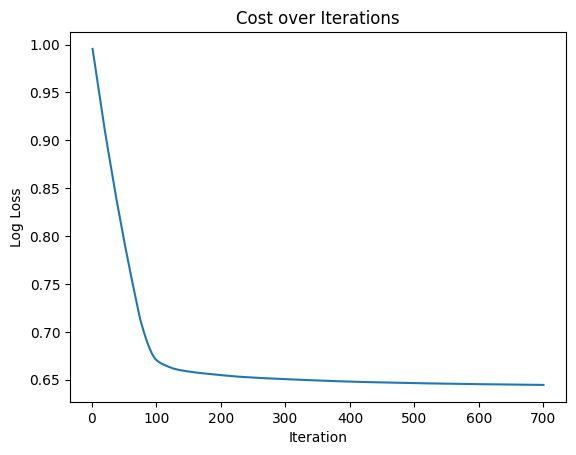

Precision: 0.7868852459016393
Recall: 0.48484848484848486
F1 score: 0.6


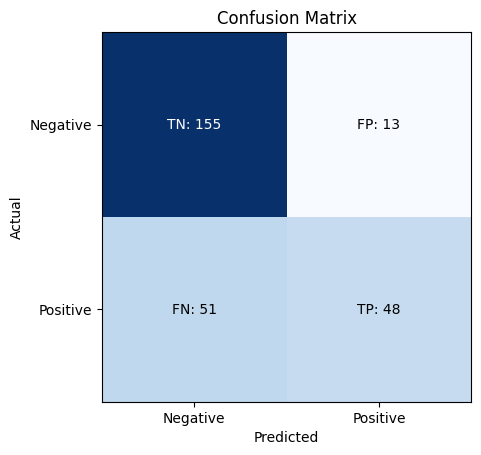

In [ ]:
svmobj2 = SupportVectorMachine(lr=0.015,reg_strength=0.05)
svmobj2.fit(X_trainpca, y_trainpca)
predictionspca = svmobj2.predict(X_testpca)
predictions_arraypca = np.array(predictionspca)
y_test_arraypca = np.array(y_testpca)
tp = np.sum((y_test_arraypca == 1) & (predictions_arraypca == 1))
fp = np.sum((y_test_arraypca == 0) & (predictions_arraypca == 1))
tn = np.sum((y_test_arraypca == 0) & (predictions_arraypca == 0))
fn = np.sum((y_test_arraypca == 1) & (predictions_arraypca == 0))
plt.show()
plt.plot(range(1, len(ll_values) + 1), ll_values)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost over Iterations")
plt.show()
f1 = f1_score(tp,fp,tn,fn)
print("F1 score:",f1)
confusion_matrix(tp,fp,tn,fn)
ll_values = []